# Perceptron

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"placement.csv")
df.shape

(100, 4)

In [4]:
df = df.drop(df.columns[[0]], axis=1)


In [5]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<Axes: xlabel='cgpa', ylabel='iq'>

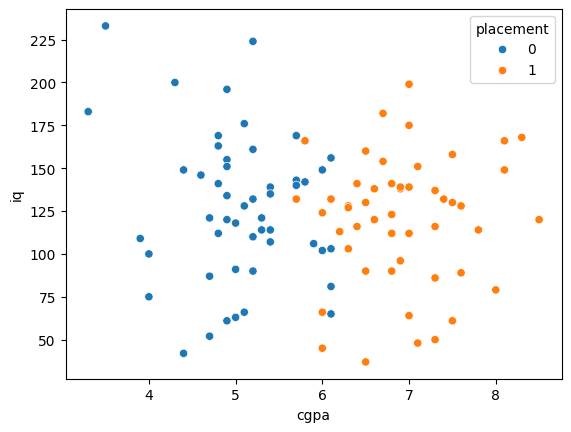

In [6]:
sns.scatterplot(x=df["cgpa"],y=df["iq"],hue=df["placement"])

In [7]:
from sklearn.linear_model import Perceptron
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

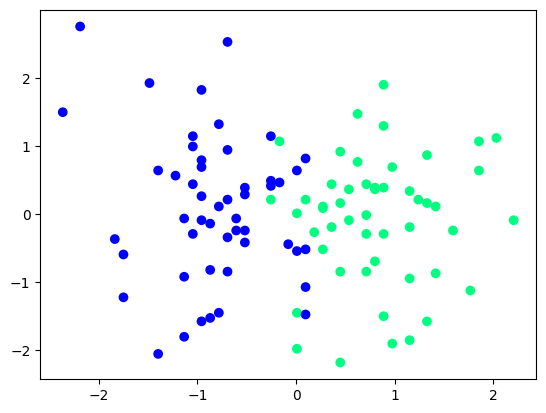

In [10]:
from sklearn.preprocessing import StandardScaler

# 1. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train the model on scaled data
clf = Perceptron(random_state=0)
clf.fit(X_scaled, y)

# 3. Important: Scale your meshgrid points before predicting
# This ensures the shaded background matches the scaled model
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
Z = clf.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# 4. Plotting
# Note: Since the model was trained on scaled data, 
# you should plot the scaled version of X as well
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='winter')
# ... rest of your plotting code using scaled coordinates

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.5))

In [11]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

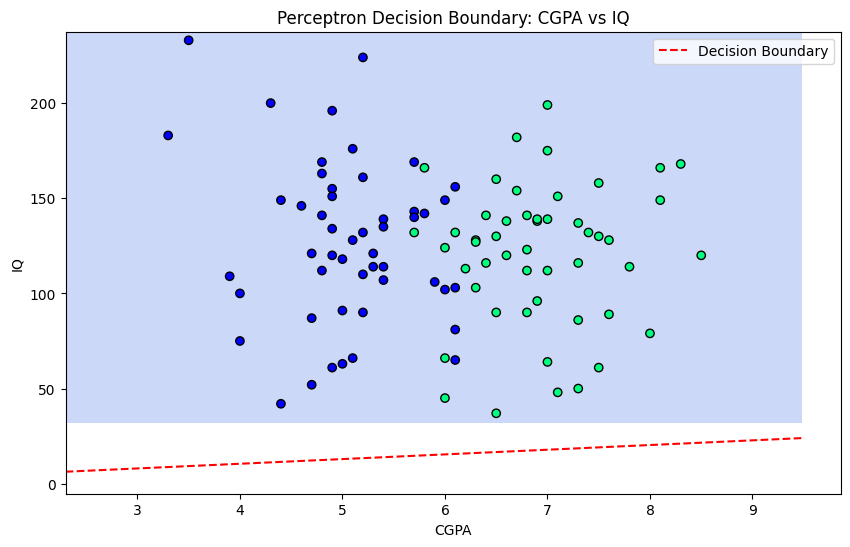

In [12]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')
w = clf.coef_[0]
b = clf.intercept_[0]
x_boundary = np.array([x_min, x_max])
y_boundary = -(w[0]/w[1]) * x_boundary - (b/w[1])

plt.plot(x_boundary, y_boundary, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Perceptron Decision Boundary: CGPA vs IQ')
plt.legend()
plt.show()

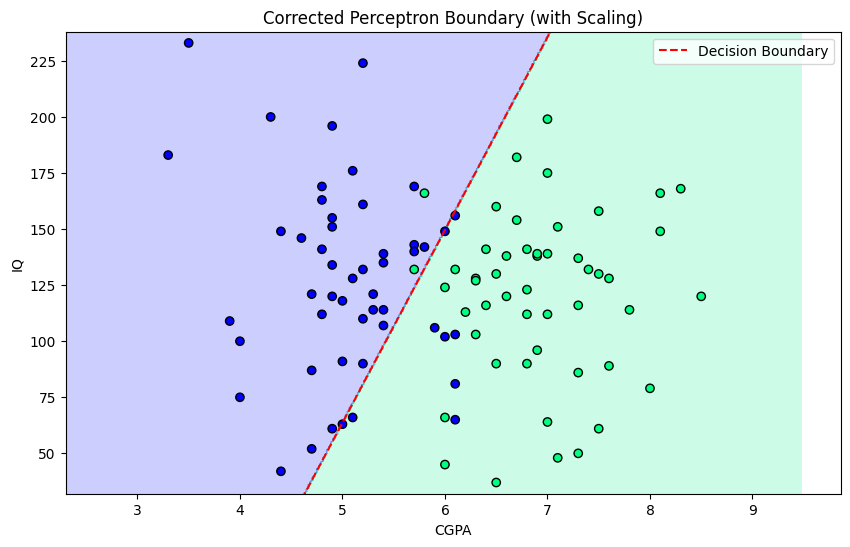

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

# 1. Prepare Data
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

# 2. Scale Features (Crucial step)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train Perceptron on scaled data
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_scaled, y)

# 4. Create Meshgrid for plotting (Original Units)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.5))

# 5. Predict: We must scale the meshgrid points before passing them to the model
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
Z = clf.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# 6. Plotting
plt.figure(figsize=(10, 6))

# Decision Regions
plt.contourf(xx, yy, Z, alpha=0.2, cmap='winter')

# Original Data Points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k')

# 7. Calculate the Decision Boundary Line for the plot
# Formula in scaled space: w1*x_s + w2*y_s + b = 0
# To plot in original space, we use the model's coefficients
w = clf.coef_[0]
b = clf.intercept_[0]

# We calculate the line where the model transitions (at 0)
# Note: Since the model is trained on SCALED data, simple y = mx + c 
# on raw values won't work easily. The contourf above already shows 
# the boundary perfectly, but here is how to draw the line manually:
x_boundary = np.linspace(x_min, x_max, 100)
# This finds the 'y' value that makes the prediction 0
y_boundary = (-(w[0] * (x_boundary - scaler.mean_[0]) / scaler.scale_[0]) - b) * (scaler.scale_[1] / w[1]) + scaler.mean_[1]

plt.plot(x_boundary, y_boundary, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Corrected Perceptron Boundary (with Scaling)')
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

In [28]:
print(y)
print(X)


[1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1]
[[ 0.19924745 -0.11697552]
 [-0.24882029 -0.73115232]
 [-0.3544904  -0.7081059 ]
 [-1.59086506 -2.01199214]
 [-0.20083951  1.63493163]
 [-0.83241122  0.15599044]
 [-1.79207014  1.07782053]
 [ 0.0856607   0.80626713]
 [-0.55865299  0.74859527]
 [-1.95974262  0.75152794]
 [-1.77828947 -0.90114581]
 [-1.77985853 -0.1815243 ]
 [-0.02194151 -2.98092432]
 [ 0.80563431  1.20500136]
 [-1.82701214  0.78302407]
 [ 0.38730728  0.42968688]
 [-0.14108668 -0.73229726]
 [-1.87955941 -0.83930476]
 [-0.18232911  0.83727062]
 [-1.77059533 -0.10255323]
 [-2.27658028  0.65867001]
 [-2.06519502  0.92649819]
 [-1.31690551  0.10216193]
 [ 1.61043259  0.46886454]
 [-1.21650394  0.45432938]
 [ 0.6139723   1.8613386 ]
 [-1.78760957 -0.79255991]
 [-1.04149161 -1.0004391 ]
 [-2.40067584 -0.53814137]
 [-1.80383452

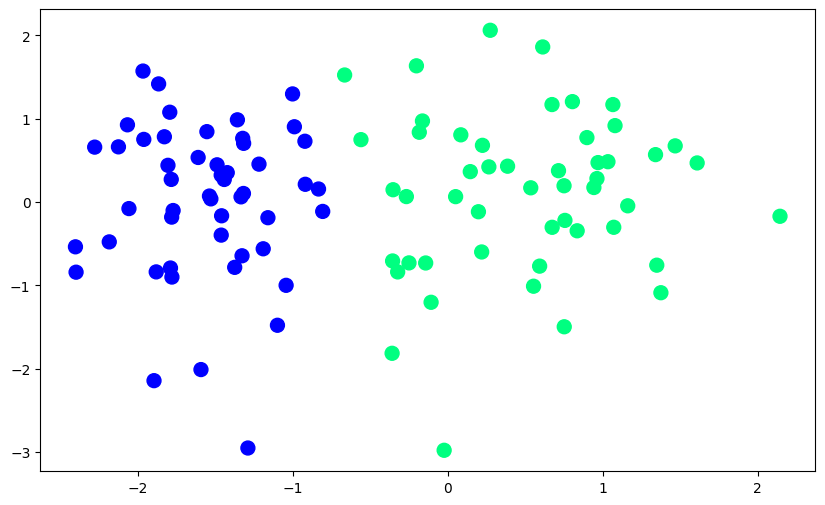

In [29]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [30]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        
def step(z):
    return 1 if z>0 else 0

In [31]:
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.29677391 0.1367861 ]
1.0


In [32]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

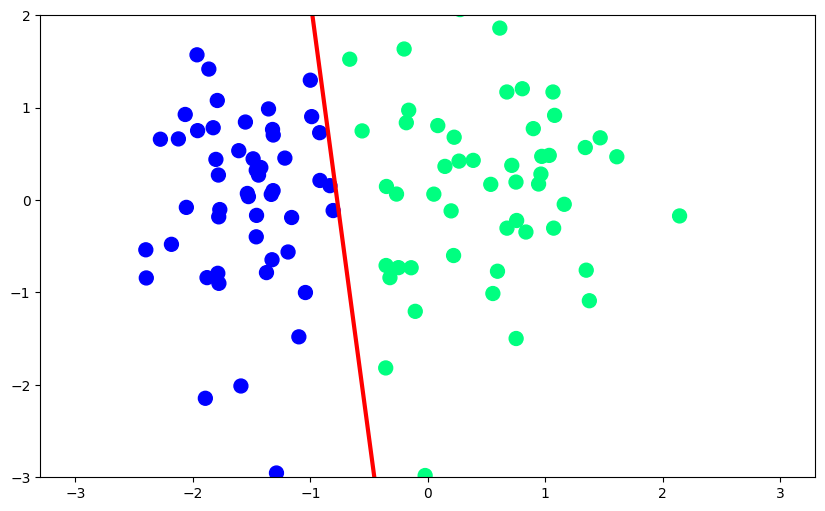

In [33]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [34]:
def perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
    
        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]
            
    return w1,w2,b
            
        
w1,w2,b = perceptron(X,y)
b

np.float64(1.4000000000000004)

-6.108023124170937 -9.250656660875727


(-3.0, 2.0)

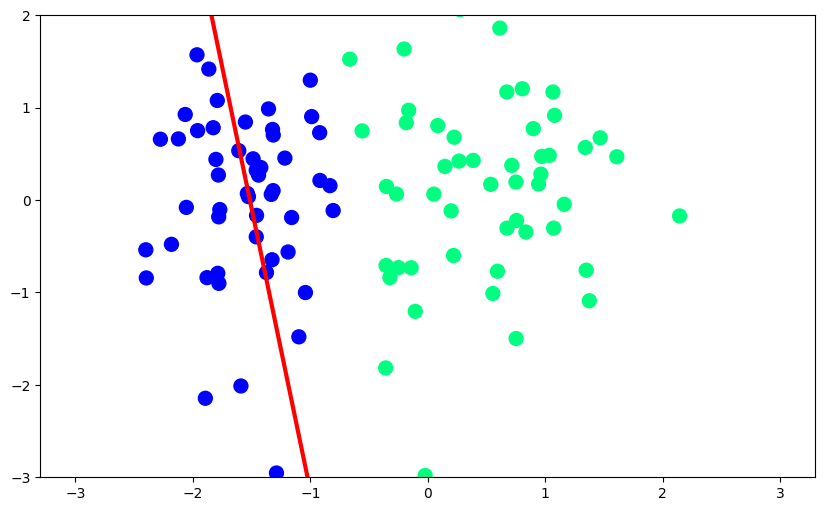

In [35]:
m = -(w1/w2)
c = -(b/w2)

print(m,c)

x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)